In [1]:
# Let's create a synthetic dataset with 10 numeric (non-periodic) features. Typically this will be the training data for your black-box

In [2]:
import numpy as np

synthetic_dataset_size = 20000
synthetic_input_features = 10
synthetic_data_lower_limit = -5
synthetic_data_upper_limit = 10
synthetic_data = np.random.uniform(synthetic_data_lower_limit, synthetic_data_upper_limit, (synthetic_dataset_size,synthetic_input_features))
print("Synthetic dataset created with size >>>", synthetic_data.shape)

Synthetic dataset created with size >>> (20000, 10)


In [3]:
# MDTerp step 1: Create dictionaries for numeric, angular, sine/cosine features. Key of dictionaries should be any name given by user (used for figures later) for identifying the features. Values must be lists. Each numeric, angular feature will have only one elements in each list. Each sine/cosine feature will have two elements in each list corresponding to sine/cosine indices of a specific angle respectively.
# For this example we will consider numeric features only.

numeric_dict = {}
for i in range(synthetic_input_features):
    numeric_dict['numeric_' + str(i)] = [i]

print(numeric_dict)

{'numeric_0': [0], 'numeric_1': [1], 'numeric_2': [2], 'numeric_3': [3], 'numeric_4': [4], 'numeric_5': [5], 'numeric_6': [6], 'numeric_7': [7], 'numeric_8': [8], 'numeric_9': [9]}


In [4]:
# MDTerp step 2: Import MDTerp.base and implement MDTerp using base.run(). Two required arguments are the dataset (created above), and location of a Python function that loads a black-box model. Go to https://github.com/shams-mehdi/MDTerp/tree/main/examples to check how this Python file should be like.

# Picks 10 points from the transition state ensemble predicted by the black-box runs MDTerp to get importance for each point and generate averaged result.

import MDTerp.base as base
import os

root_dir = './examples/'
os.makedirs(root_dir, exist_ok = True)
result_dir = root_dir + 'results/'

model_function_loc = root_dir + 'MDTerp_demo_blackbox1.txt'
base.run(synthetic_data, model_function_loc, save_dir = result_dir, numeric_dict = numeric_dict, point_max = 10, prob_threshold = 0.499)

08-03-25 01:16:58 initialization  INFO     ----------------------------------------------------------------------------------------------------
08-03-25 01:16:58 initialization  INFO     Starting MDTerp...
08-03-25 01:16:58 initialization  INFO     ----------------------------------------------------------------------------------------------------
08-03-25 01:16:58 initialization  INFO     MDTerp result location >>> ./examples/results/
08-03-25 01:16:58 initialization  INFO     Defined numeric features >>> 10
08-03-25 01:16:58 initialization  INFO     Defined angle features >>> 0
08-03-25 01:16:58 initialization  INFO     Defined sin_cos features >>> 0
08-03-25 01:16:58 initialization  INFO     Number of samples in blackbox model training data >>> 20000
08-03-25 01:16:58 initialization  INFO     Number of columns in blackbox model training data >>> 10
08-03-25 01:16:58 initialization  INFO     ---------------------------------------------------------------------------------------------

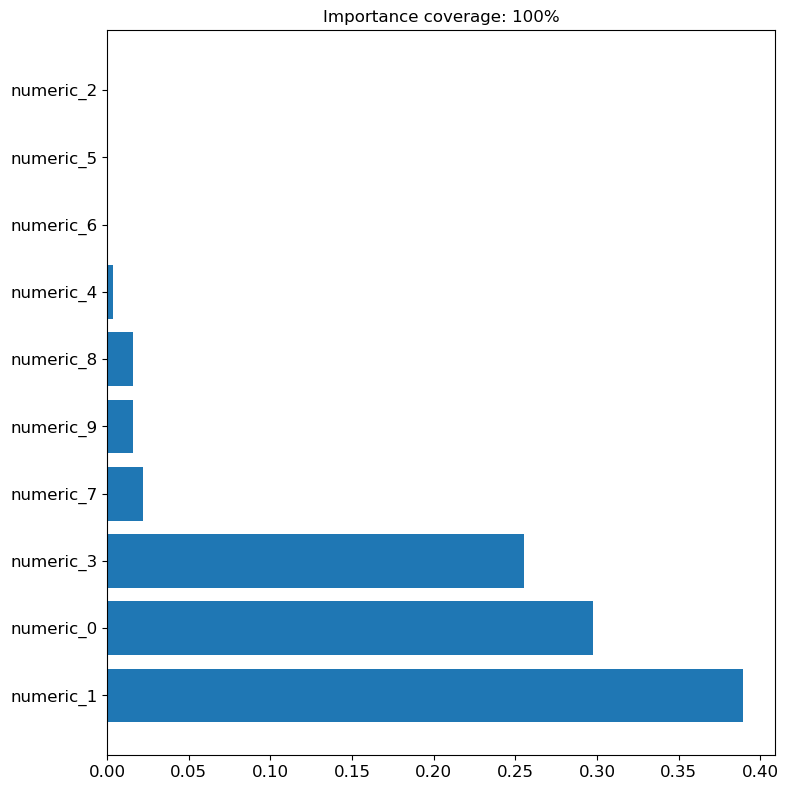

In [5]:
# MDTerp step 3: Summarize the transition state ensemble behavior from the results of the feature importance for each of the 10 picked points above.
# Generates a figure for each of the identified transition state.

from MDTerp.utils import summary

feature_names_loc = result_dir + 'MDTerp_feature_names.npy'
all_result_loc = result_dir + 'MDTerp_results_all.pkl'
save_fig_dir = result_dir + 'figs'

summary_imp = summary(feature_names_loc, all_result_loc, save_fig_dir, top_k = 10, fs = 12)

In [6]:
# Question: What happens as you decrease prob_threshold from 0.499 to 0.45 for example?
# If you are seeing unexpected result, why does that happen?